In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [5]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


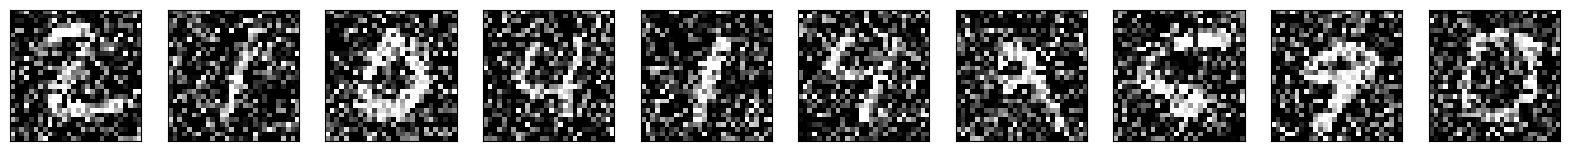

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
input_img = keras.Input(shape=(28, 28, 1))
conv1  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(input_img)
maxpool1 = layers.MaxPooling2D((2,2),padding='same')(conv1)
conv2  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool1)
maxpool2 = layers.MaxPooling2D((2,2),padding='same')(conv1)
conv3  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool2)
maxpool3 = layers.MaxPooling2D((2,2),padding='same')(conv3)
conv4  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool3)
upsamp1 = layers.UpSampling2D((2,2))(conv4)
conv5  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(upsamp1)
upsamp2 = layers.UpSampling2D((2,2))(conv5)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsamp2)


autoencoder = keras.Model(input_img, output)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          9248  

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 116s 243ms/step - loss: 0.1609 - val_loss: 0.1168
Epoch 2/2
469/469 [==============================] - 111s 237ms/step - loss: 0.1133 - val_loss: 0.1084


In [11]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 5s 14ms/step


DHANUMALYA-212222230030


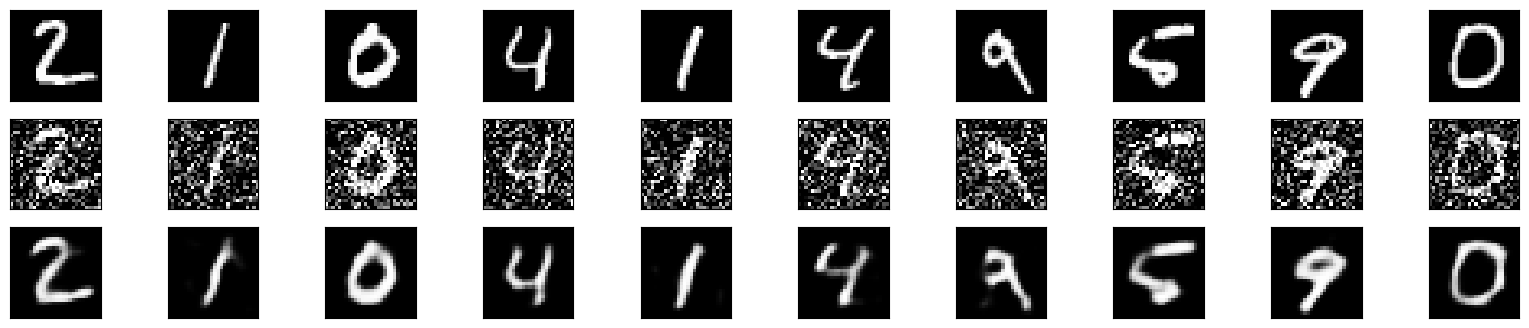

In [13]:
print("DHANUMALYA-212222230030")
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()